In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [2]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# XinXu ADME NCATS

In [3]:
xinxu = pd.read_csv("processed/xin_xu_ncats_adme.csv")

In [4]:
xinxu.head()

,SMILES,CYP2C9 Substrate Class,CYP2D6 Substrate Class,CYP3A4 Substrate Class,CYP2C9 Activity Class,CYP2D6 Activity Class,CYP3A4 Activity Class,CYP2C9 Inhibitor Class,CYP2D6 Inhibitor Class,CYP3A4_ Inhibitor Class,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type,active,common_name
0,CC(C)(C)C1=C(O)C=CC(O)=C1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,CC(C)(C)c1cc(O)ccc1O,BGNXCDMCOKJUMV-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
1,OC(=O)C\C(=C/C(O)=O)C(O)=O,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN,O=C(O)C=C(CC(=O)O)C(=O)O,GTZCVFVGUGFEME-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
2,CC(C)=CCC\C(C)=C\CO,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,XinXu_NCATS_ADME_raw,assay,substrate,True,NaN
3,CC1=CC(N)=C2C=C(NC(=O)NC3=CC4=C(C=C3)N=C(C)C=C...,0.0,0.0,NaN,0.0,1.0,0.0,0,1,NaN,Cc1cc(N)c2cc(NC(=O)Nc3ccc4nc(C)cc(N)c4c3)ccc2n1,HOUSDILKOJMENG-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
4,CC1=C(O)C(CN)=C(CO)C=N1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Cc1ncc(CO)c(CN)c1O,NHZMQXZHNVQTQA-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN


In [5]:
xinxu_actives = xinxu.query("active == True")
xinxu_actives = xinxu_actives[keep_cols_all]
xinxu_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
2,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
6,OC(CCN1CCCCC1)(c1ccccc1)c1ccccc1,RQXCLMGKHJWMOA-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
8,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
10,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
13,O=C(O)CP(=O)(O)O,XUYJLQHKOGNDPB-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
...,...,...,...,...,...,...,...
4283,Cc1ccc2c(c1)[C@H]1CN(C)CC[C@H]1N2C(=O)CSc1nnnn...,GJNBAISSZRNGTM-UYAOXDASSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
4285,c1ccc(C2(c3ccccc3)OC[C@@H]([C@H]3CCCCN3)O2)cc1,HGKAMARNFGKMLC-MOPGFXCFSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
4287,C=C(C)Cn1c(SCC(=O)c2cccs2)nc2sc3c(c2c1=O)CCCC3,XAKJIQPEGSCYIP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
4297,CCOC(=O)CSc1nc2c(sc3ccccc32)c(=O)n1CCCN1CCCC1,SKDRHRAYBYQVNU-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate


# Carbon-mangels

In [6]:
carbon_mangels = pd.read_csv("./processed/carbon-mangels_2011.csv")

In [7]:
carbon_mangels_actives = carbon_mangels.query("active == True")
carbon_mangels_actives = carbon_mangels[keep_cols_all]

In [8]:
carbon_mangels_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,MCGSCOLBFJQGHM-SCZZXKLOSA-N,False,carbon-mangels_2011,assay,abacavir,substrate
1,COCc1c(C(=O)OC(C)C)ncc2[nH]c3ccc(OCc4ccccc4)cc...,RLFKILXOLJVUNF-UHFFFAOYSA-N,False,carbon-mangels_2011,assay,abecarnil,substrate
2,C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...,GZOSMCIZMLWJML-VJLLXTKPSA-N,False,carbon-mangels_2011,assay,abiraterone,substrate
3,CCCC(=O)Nc1ccc(OC[C@@H](O)CNC(C)C)c(C(C)=O)c1,GOEMGAFJFRBGGG-HNNXBMFYSA-N,False,carbon-mangels_2011,assay,acebutolol,substrate
4,O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,MNIPYSSQXLZQLJ-UHFFFAOYSA-N,False,carbon-mangels_2011,assay,aceclofenac,substrate
...,...,...,...,...,...,...,...
662,Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1,ZAFYATHCZYHLPB-UHFFFAOYSA-N,True,carbon-mangels_2011,assay,zolpidem,substrate
663,NS(=O)(=O)Cc1noc2ccccc12,UBQNRHZMVUUOMG-UHFFFAOYSA-N,False,carbon-mangels_2011,assay,zonisamide,substrate
664,CN1CCN(C(=O)O[C@H]2c3nccnc3C(=O)N2c2ccc(Cl)cn2...,GBBSUAFBMRNDJC-INIZCTEOSA-N,False,carbon-mangels_2011,assay,zopiclone,substrate
665,CN(C)CCOC1=Cc2ccccc2Sc2ccc(Cl)cc21,HDOZVRUNCMBHFH-UHFFFAOYSA-N,True,carbon-mangels_2011,assay,zotepine,substrate


# Chembl

There is only a single set of compounds in ChEMBL with substrate activity explicitly marked 



In [9]:
chembl_actives = pd.read_csv("processed/chembl_active.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type,dataset,active
0,COc1cccc(C2(O)CCCCC2CN(C)C)c1,TVYLLZQTGLZFBW-UHFFFAOYSA-N,TRAMADOL,substrate,ChEMBL_curated,True
1,CC(C)(C)NC[C@H](O)COc1nsnc1N1CCOCC1,BLJRIMJGRPQVNF-JTQLQIEISA-N,TIMOLOL,substrate,ChEMBL_curated,True
2,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2,KLBQZWRITKRQQV-UHFFFAOYSA-N,THIORIDAZINE,substrate,ChEMBL_curated,True
3,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,NKANXQFJJICGDU-QPLCGJKRSA-N,TAMOXIFEN,substrate,ChEMBL_curated,True
4,C1CCN2C[C@@H]3C[C@@H](CN4CCCC[C@@H]34)[C@H]2C1,SLRCCWJSBJZJBV-ZQDZILKHSA-N,SPARTEINE,substrate,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [10]:
fda = pd.read_csv("./FDA/fda.csv")

In [11]:
fda

,CANONICAL_SMILES,active,common_name,action_type,FDA_recommended,dataset,INCHIKEY
0,CCC1=CC=CC2=C1OC(=C2)C(CNC(C)(C)C)O,True,bufuralol,substrate,True,FDA,SSEBTPPFLLCUMN-UHFFFAOYSA-N
1,CN1CC[C@@]23CCCC[C@@H]2[C@@H]1CC4=C3C=C(C=C4)OC,True,dextromethorphan,substrate,True,FDA,MKXZASYAUGDDCJ-NJAFHUGGSA-N
2,CNCCCN1C2=CC=CC=C2CCC3=CC=CC=C31,True,desipramine,substrate,True,FDA,HCYAFALTSJYZDH-UHFFFAOYSA-N
3,C1CC2=C(C=CC(=C2)F)OC1C(CNCC(C3CCC4=C(O3)C=CC(...,True,nebivolol,substrate,True,FDA,KOHIRBRYDXPAMZ-UHFFFAOYSA-N


# Flockheart table

In [12]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.drop(columns="SMILES", inplace=True)

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [13]:
combined_literature = pd.concat([xinxu_actives, carbon_mangels_actives, fda, flockheart, chembl_actives])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended
2,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
6,OC(CCN1CCCCC1)(c1ccccc1)c1ccccc1,RQXCLMGKHJWMOA-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
8,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
10,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
13,O=C(O)CP(=O)(O)O,XUYJLQHKOGNDPB-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
...,...,...,...,...,...,...,...,...
30,CNCC[C@@H](Oc1ccccc1C)c1ccccc1,VHGCDTVCOLNTBX-QGZVFWFLSA-N,True,ChEMBL_curated,NaN,ATOMOXETINE,substrate,NaN
31,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,CEUORZQYGODEFX-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,ARIPIPRAZOLE,substrate,NaN
32,CN(C)CCC=C1c2ccccc2CCc2ccccc21,KRMDCWKBEZIMAB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,AMITRIPTYLINE,substrate,NaN
33,COCCc1ccc(OC[C@H](O)CNC(C)C)cc1,IUBSYMUCCVWXPE-CQSZACIVSA-N,True,ChEMBL_curated,NaN,(R)-METOPROLOL,substrate,NaN


In [14]:
# combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [15]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

173

In [16]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [17]:
combined_literature_chembl = combined_literature

In [18]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    4
Name: count, dtype: int64

In [19]:
combined_literature_chembl.dataset.value_counts()

dataset
XinXu_NCATS_ADME_raw    1318
carbon-mangels_2011      667
flockheart                71
ChEMBL_curated            35
FDA                        4
Name: count, dtype: int64

In [20]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

173

In [21]:
combined_literature_chembl.INCHIKEY.isna().sum()

0

In [22]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended
2,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
6,OC(CCN1CCCCC1)(c1ccccc1)c1ccccc1,RQXCLMGKHJWMOA-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
8,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
10,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
13,O=C(O)CP(=O)(O)O,XUYJLQHKOGNDPB-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
...,...,...,...,...,...,...,...,...
30,CNCC[C@@H](Oc1ccccc1C)c1ccccc1,VHGCDTVCOLNTBX-QGZVFWFLSA-N,True,ChEMBL_curated,NaN,ATOMOXETINE,substrate,NaN
31,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,CEUORZQYGODEFX-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,ARIPIPRAZOLE,substrate,NaN
32,CN(C)CCC=C1c2ccccc2CCc2ccccc21,KRMDCWKBEZIMAB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,AMITRIPTYLINE,substrate,NaN
33,COCCc1ccc(OC[C@H](O)CNC(C)C)cc1,IUBSYMUCCVWXPE-CQSZACIVSA-N,True,ChEMBL_curated,NaN,(R)-METOPROLOL,substrate,NaN


In [23]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,1
AAOVKJBEBIDNHE-UHFFFAOYSA-N,1
AAYTXOPXLXAKHP-UHFFFAOYSA-N,1
ABJKWBDEJIDSJZ-UHFFFAOYSA-N,1
...,...
ZYVWDTSWAQEEMR-UHFFFAOYSA-N,1
ZYVXTMKTGDARKR-UHFFFAOYSA-N,1
ZZHLYYDVIOPZBE-UHFFFAOYSA-N,1


In [24]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

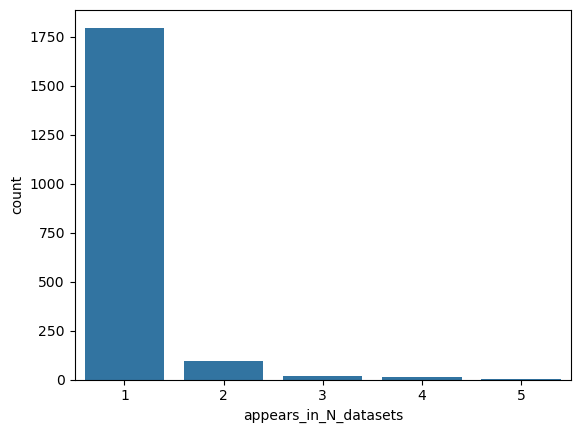

In [25]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [26]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,appears_in_N_datasets
0,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
1,OC(CCN1CCCCC1)(c1ccccc1)c1ccccc1,RQXCLMGKHJWMOA-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
2,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
3,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,2
4,O=C(O)CP(=O)(O)O,XUYJLQHKOGNDPB-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
...,...,...,...,...,...,...,...,...,...
2090,CNCC[C@@H](Oc1ccccc1C)c1ccccc1,VHGCDTVCOLNTBX-QGZVFWFLSA-N,True,ChEMBL_curated,NaN,ATOMOXETINE,substrate,NaN,4
2091,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,CEUORZQYGODEFX-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,ARIPIPRAZOLE,substrate,NaN,4
2092,CN(C)CCC=C1c2ccccc2CCc2ccccc21,KRMDCWKBEZIMAB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,AMITRIPTYLINE,substrate,NaN,4
2093,COCCc1ccc(OC[C@H](O)CNC(C)C)cc1,IUBSYMUCCVWXPE-CQSZACIVSA-N,True,ChEMBL_curated,NaN,(R)-METOPROLOL,substrate,NaN,1


In [27]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart,INCHIKEY
0,False,False,True,False,False,GLZPCOQZEFWAFX-JXMROGBWSA-N
1,False,False,True,False,False,RQXCLMGKHJWMOA-UHFFFAOYSA-N
2,False,False,True,False,False,WSPOMRSOLSGNFJ-VGOFMYFVSA-N
3,False,False,True,False,False,JURKNVYFZMSNLP-UHFFFAOYSA-N
4,False,False,True,False,False,XUYJLQHKOGNDPB-UHFFFAOYSA-N
...,...,...,...,...,...,...
2090,True,False,False,False,False,VHGCDTVCOLNTBX-QGZVFWFLSA-N
2091,True,False,False,False,False,CEUORZQYGODEFX-UHFFFAOYSA-N
2092,True,False,False,False,False,KRMDCWKBEZIMAB-UHFFFAOYSA-N
2093,True,False,False,False,False,IUBSYMUCCVWXPE-CQSZACIVSA-N


In [28]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [29]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [30]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart
0,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
1,OC(CCN1CCCCC1)(c1ccccc1)c1ccccc1,RQXCLMGKHJWMOA-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
2,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
3,CN(C)CCC=C1c2ccccc2C=Cc2ccccc21,JURKNVYFZMSNLP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,2,False,False,True,True,False
4,O=C(O)CP(=O)(O)O,XUYJLQHKOGNDPB-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,CNCC[C@@H](Oc1ccccc1C)c1ccccc1,VHGCDTVCOLNTBX-QGZVFWFLSA-N,True,ChEMBL_curated,NaN,ATOMOXETINE,substrate,NaN,4,True,False,True,True,True
2091,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,CEUORZQYGODEFX-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,ARIPIPRAZOLE,substrate,NaN,4,True,False,True,True,True
2092,CN(C)CCC=C1c2ccccc2CCc2ccccc21,KRMDCWKBEZIMAB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,AMITRIPTYLINE,substrate,NaN,4,True,False,True,True,True
2093,COCCc1ccc(OC[C@H](O)CNC(C)C)cc1,IUBSYMUCCVWXPE-CQSZACIVSA-N,True,ChEMBL_curated,NaN,(R)-METOPROLOL,substrate,NaN,1,True,False,False,False,False


In [31]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
substrate    2095
Name: count, dtype: int64

In [32]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

1922

In [33]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

1319

In [34]:
# we can just sort by N_datasets as no specific chembl curation to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)


In [35]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_41126/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_41126/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [36]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

1206

In [37]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [38]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart
2003,CNCCCN1c2ccccc2CCc2ccccc21,HCYAFALTSJYZDH-UHFFFAOYSA-N,True,desipramine,substrate,NaN,5,True,True,True,True,True
2083,CNCCCN1c2ccccc2CCc2ccccc21,HCYAFALTSJYZDH-UHFFFAOYSA-N,True,DESIPRAMINE,substrate,NaN,5,True,True,True,True,True
1482,CNCCCN1c2ccccc2CCc2ccccc21,HCYAFALTSJYZDH-UHFFFAOYSA-N,True,desipramine,substrate,NaN,5,True,True,True,True,True
32,CNCCCN1c2ccccc2CCc2ccccc21,HCYAFALTSJYZDH-UHFFFAOYSA-N,True,desipramine,substrate,NaN,5,True,True,True,True,True
1987,CNCCCN1C2=CC=CC=C2CCC3=CC=CC=C31,HCYAFALTSJYZDH-UHFFFAOYSA-N,True,desipramine,substrate,True,5,True,True,True,True,True


In [39]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

2003     True
2083     True
1482     True
32       True
1987     True
        ...  
769     False
768     False
767     False
766     False
781     False
Name: INCHIKEY, Length: 2095, dtype: bool

In [40]:
# combined_literature_chembl_w_counts["FDA_recommended"] = combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

In [41]:
combined_literature_chembl_w_counts["FDA_recommended"] = fda_reccomends_mask

In [42]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [43]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("inhibitor")

In [44]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [45]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [46]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [47]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart,inclusion_score
2003,CNCCCN1c2ccccc2CCc2ccccc21,HCYAFALTSJYZDH-UHFFFAOYSA-N,True,desipramine,substrate,True,5,True,True,True,True,True,5
2053,CC(C)(C)NC[C@H](O)COc1nsnc1N1CCOCC1,BLJRIMJGRPQVNF-JTQLQIEISA-N,True,timolol,substrate,False,4,True,False,True,True,True,4
19,CN(C)CCC(c1ccc(Cl)cc1)c1ccccn1,SOYKEARSMXGVTM-UHFFFAOYSA-N,True,chlorpheniramine,substrate,False,4,True,False,True,True,True,4
2022,CN(C)CCCN1c2ccccc2CCc2ccccc21,BCGWQEUPMDMJNV-UHFFFAOYSA-N,True,imipramine,substrate,False,4,True,False,True,True,True,4
1748,Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O,FELGMEQIXOGIFQ-UHFFFAOYSA-N,True,ondansetron,substrate,False,4,True,False,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,O=c1[nH]c(=O)n([C@@H]2CCCO2)cc1F,WFWLQNSHRPWKFK-LURJTMIESA-N,False,tegafur,substrate,False,1,False,False,False,True,False,1
1900,CCCCCN=C(N)NN=Cc1c[nH]c2ccc(CO)cc12,HXYYJPLPXWLAMQ-UHFFFAOYSA-N,True,tegaserod,substrate,False,1,False,False,False,True,False,1
1901,CCCc1nc2c(C)cc(-c3nc4ccccc4n3C)cc2n1Cc1ccc(-c2...,RMMXLENWKUUMAY-UHFFFAOYSA-N,False,telmisartan,substrate,False,1,False,False,False,True,False,1
1902,CN1C(=O)C(O)N=C(c2ccccc2)c2cc(Cl)ccc21,SEQDDYPDSLOBDC-UHFFFAOYSA-N,False,temazepam,substrate,False,1,False,False,False,True,False,1


In [48]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

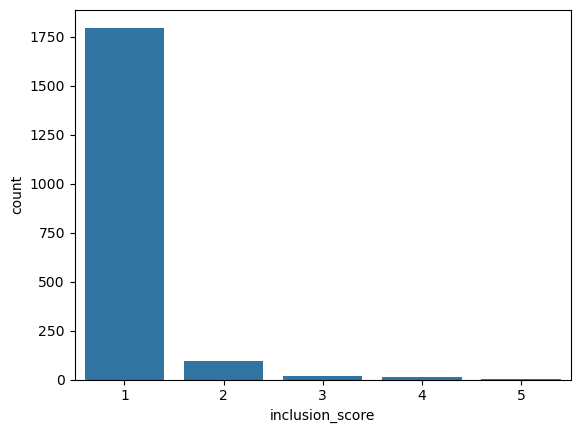

In [49]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")

In [50]:
combined_literature_chembl_w_counts["action_type"].value_counts()

action_type
substrate    1922
Name: count, dtype: int64